## QXD0178 - Mineração de Dados
# Preparação da base de dados

Elysson Alves de Lacerda - 536587 - Sistemas de Informação

# Lista de Exercícios: Limpeza de dados

Nesta lista de exercícios, você será deverá aplicar técnicas de processamento de dados e limpeza de dados para lidar com problemas comuns encontrados em conjuntos de dados do mundo real. Aplique as técnicas aprendidas na disciplina de Mineração de Dados para tratar dados faltantes e inconsistências, tornando os dados prontos para análises subsequentes.

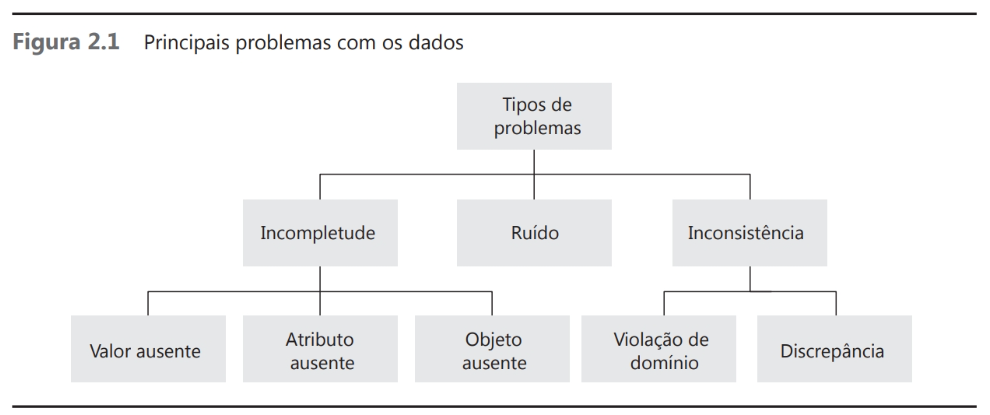

Para este exercícios será utilizada a base de dados [Food choices: College students' food and cooking preferences](https://www.kaggle.com/datasets/borapajo/food-choices?select=food_coded.csv) que contém informações sobre hábitos alimentares de um conjunto de estudantes.


Este conjunto de dados possui valores ausentes em várias colunas. Sua tarefa é:

1. Identificar todas as colunas com dados faltantes.
1. Escolher a estratégia apropriada para tratar cada tipo de dado faltante (exemplo: preenchimento com média, mediana, valor mais frequente, ou remoção de linhas com dados faltantes).
1. Identificar as inconsistências específicas no conjunto de dados, como valores fora do intervalo.
1. Desenvolver um plano de ação para lidar com cada tipo de inconsistência (por exemplo, remoção de registros, correção de valores, ou imputação).
1. Aplicar as estratégias e o plano de ação escolhidos para preencher ou remover os dados faltantes e limpar os dados inconsistentes.
1. Documentar as ações tomadas em cada etapa do processo e justificar suas decisões.

**Todos os problemas** no conjunto precisam ser detectados e as ações tomadas devidamente justificadas e documentadas neste `.ipynb`. As justificativas devem ser descritas em células do tipo *Markdown* e as operações/ajustes deve estar implementadas na célula de código imediatamente subsequênte. O texto deve ser linear e conciso.

# Solução


## Carga do conjunto de dados `food_coded.csv`

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/She-Codes-Now/Intro-to-Data-Science-with-R/master/food_coded.csv")

df


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,3.5,1,1,610,4.0,420.0,2,"wine. mac and cheese, pizza, ice cream",boredom and sadness,NaN,...,1.0,1.0,5,940.0,500,Softball,5,1,1315,156
121,3,1,1,265,2.0,315.0,2,Pizza / Wings / Cheesecake,Loneliness / Homesick / Sadness,NaN,...,1.0,NaN,4,940.0,500,basketball,5,2,1315,180
122,3.882,1,1,720,NaN,420.0,1,"rice, potato, seaweed soup",sadness,NaN,...,1.0,2.0,5,580.0,690,none,4,2,1315,120
123,3,2,1,720,4.0,420.0,1,"Mac n Cheese, Lasagna, Pizza","happiness, they are some of my favorite foods",NaN,...,2.0,2.0,1,940.0,500,NaN,3,1,1315,135


## Primeiro contato
Identificar as primeiras linhas e informações gerais do dataset, afim de entender a sua estrutura.

In [3]:
# Exibindo as informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_


## Ajuste do atributo `soup`:

A coluna `soup` tem um dado faltante na linha 63. O valor será preenchido com o valor mais escolhido na amostra (moda), visando diminuir a incompletude no dataset, por ser um dado categórico, preencher com média ou mediana não faria sentido a moda é o valor mais frequente e, portanto, representa o que a maioria dos casos apresenta mantendo a coerência da coluna sem introduzir um valor arbitrário.

In [4]:
display(df.loc[[63],'soup':])
df['soup'].fillna(df['soup'].mode()[0], inplace=True)
display(df.loc[[63],'soup':])

,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,NaN,1.0,4,1165.0,690,rowing,5,2,1315,180


C:\Users\elyss\AppData\Local\Temp\ipykernel_15916\1467016892.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['soup'].fillna(df['soup'].mode()[0], inplace=True)


,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,1.0,1.0,4,1165.0,690,rowing,5,2,1315,180


## Incompletude

Uma das decisões que se pode tomar é descartar os valores nulos, mas claro levando em consideração qual pergunta deve-se responder, ou, caso o descarte vá danificar a análise futura, exemplo, existem casos que dropar um coluna nem sempre é a melhor escolha, trocar os valores nulos por moda, média ou mediana ou um valor padrão dependendo da natureza da coluna, como feito no exemplo anterior.

### `sports`

Ela possui valores faltando nas linhas 19 e 121, como os valores não variam muito, trocar pela moda é interessante




In [ ]:
display(df.loc[[19],'sports':])
display(df.loc[[121],'sports':])
df['sports'].fillna(df['sports'].mode()[0], inplace=True)
display(df.loc[[19],'sports':])
display(df.loc[[121],'sports':])

,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
19,NaN,3,940.0,345,basketball,2,2,900,165


,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
121,NaN,4,940.0,500,basketball,5,2,1315,180


<ipython-input-41-9d45073ace10>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sports'].fillna(df['sports'].mode()[0], inplace=True)


,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
19,1.0,3,940.0,345,basketball,2,2,900,165


,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
121,1.0,4,940.0,500,basketball,5,2,1315,180


### `calories_day`

Olhando por cima, tem dados faltantes da linhas 0 até 124, por ser numérico, trocar pela média é uma recomendação para esse caso

In [ ]:
display(df.loc[[0],'calories_day':])
display(df.loc[[8],'calories_day':])
display(df.loc[[15],'calories_day':])
media = df['calories_day'].mean()
media_rounded = round(media,1)
df['calories_day'].fillna(media_rounded, inplace=True)
display(df.loc[[0],'calories_day':])
display(df.loc[[8],'calories_day':])
display(df.loc[[15],'calories_day':])

,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187


,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
8,NaN,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,3.0,2,1.0,I eat whatever I want in moderation.,...,2.0,2.0,5,725.0,345,none,3,2,760,180


,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
15,NaN,980.0,2,"cookies, donuts, candy bars",boredom,2.0,4.0,2,1.0,I like a lot of foods that arent home cooked o...,...,2.0,1.0,1,940.0,345,Hockey,1,2,1315,180


<ipython-input-42-e6ab9bc766ef>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['calories_day'].fillna(media_rounded, inplace=True)


,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,3.0,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187


,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
8,3.0,420.0,1,"Donuts, ice cream, chips",Boredom,2.0,3.0,2,1.0,I eat whatever I want in moderation.,...,2.0,2.0,5,725.0,345,none,3,2,760,180


,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
15,3.0,980.0,2,"cookies, donuts, candy bars",boredom,2.0,4.0,2,1.0,I like a lot of foods that arent home cooked o...,...,2.0,1.0,1,940.0,345,Hockey,1,2,1315,180


### `tortilla_calories`

Tem dado faltando na linha 100, por ter pouca variação, moda é ideal

In [ ]:
display(df.loc[[100],'tortilla_calories':])
df['tortilla_calories'].fillna(df['tortilla_calories'].mode()[0], inplace=True)
display(df.loc[[100],'tortilla_calories':])

,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
100,NaN,500,"Volleyball, Track",5,2,900,125


<ipython-input-43-b153c7ec2e29>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tortilla_calories'].fillna(df['tortilla_calories'].mode()[0], inplace=True)


,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
100,1165.0,500,"Volleyball, Track",5,2,900,125


### `calories_scone`

Tem `NaN` na linha 100, trocaremos por moda.

In [ ]:
display(df.loc[[100],'calories_scone':])
df['calories_scone'].fillna(df['calories_scone'].mode()[0], inplace=True)
display(df.loc[[100],'calories_scone':])

,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
100,NaN,2,"watermelon, grapes, ice cream","Sad, bored, excited",3.0,3.0,3,1.0,I typically eat very healthy. i consume fruits...,1,...,1.0,1.0,5,1165.0,500,"Volleyball, Track",5,2,900,125


<ipython-input-44-f977e81e69f4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['calories_scone'].fillna(df['calories_scone'].mode()[0], inplace=True)


,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
100,420.0,2,"watermelon, grapes, ice cream","Sad, bored, excited",3.0,3.0,3,1.0,I typically eat very healthy. i consume fruits...,1,...,1.0,1.0,5,1165.0,500,"Volleyball, Track",5,2,900,125


### `calories_food_reason_coded`

Tem dados faltantes da 106 até 124, nesse caso, a coluna se repete com os mesmo dados, excluindo a primeira aparição dessa colunas e renomear a outra é uma ação interessante

In [ ]:
print(df.columns)
del df['comfort_food_reasons_coded']
df.rename(columns={'comfort_food_reasons_coded.1': 'comfort_food_reasons_coded'}, inplace=True)
print(df['comfort_food_reasons_coded'])
print(df.columns)

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

### `cook`

Linhas 82, 88 e 124 sem dados, nesse caso a variação é visível, trocar pela média é melhor

In [ ]:
display(df.loc[[82],'cook':])
display(df.loc[[88],'cook':])
display(df.loc[[124],'cook':])
media = df['cook'].mean()
media_rounded = round(media,0)
df['cook'].fillna(media_rounded, inplace=True)
display(df.loc[[82],'cook':])
display(df.loc[[88],'cook':])
display(df.loc[[124],'cook':])

,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
82,NaN,2,1.0,I eat two-tree meals per day. Always eat a bre...,4,2.0,Food is not as healthy.,1,3,5,...,1.0,1.0,3,580.0,345,wrestling,3,2,575,170


,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
88,NaN,9,1.0,High protein and high carbs with fruits and ve...,2,2.0,Willingly eating vegetables,2,5,1,...,1.0,2.0,5,1165.0,850,NaN,4,1,1315,175


,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
124,NaN,5,3.0,high in protein and low in carbohydrates.,1,1.0,I have learned to eat more vegetables.,2,5,1,...,1.0,2.0,2,725.0,345,NaN,4,2,575,135


<ipython-input-46-2d5f90543cf9>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cook'].fillna(media_rounded, inplace=True)


,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
82,3.0,2,1.0,I eat two-tree meals per day. Always eat a bre...,4,2.0,Food is not as healthy.,1,3,5,...,1.0,1.0,3,580.0,345,wrestling,3,2,575,170


,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
88,3.0,9,1.0,High protein and high carbs with fruits and ve...,2,2.0,Willingly eating vegetables,2,5,1,...,1.0,2.0,5,1165.0,850,NaN,4,1,1315,175


,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
124,3.0,5,3.0,high in protein and low in carbohydrates.,1,1.0,I have learned to eat more vegetables.,2,5,1,...,1.0,2.0,2,725.0,345,NaN,4,2,575,135


### `cuisine`

Tem muitos dados faltantes, mas como o valor 1.0 aparece com muita frequência, substituir os faltantes por moda é melhor

In [ ]:
display(df.loc[[0],'cuisine':])
display(df.loc[[32],'cuisine':])
df['cuisine'].fillna(df['cuisine'].mode()[0], inplace=True)
display(df.loc[[0],'cuisine':])
display(df.loc[[32],'cuisine':])

,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187


,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
32,NaN,"Not that balanced, but I try not to eat fatty ...",2,2.0,I eat more junk food now.,1,3,3,2.0,5,...,1.0,1.0,5,580.0,345,Soccer,5,1,760,NaN


<ipython-input-47-1ea0f8677053>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cuisine'].fillna(df['cuisine'].mode()[0], inplace=True)


,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,1.0,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187


,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
32,1.0,"Not that balanced, but I try not to eat fatty ...",2,2.0,I eat more junk food now.,1,3,3,2.0,5,...,1.0,1.0,5,580.0,345,Soccer,5,1,760,NaN


### `drink`

Fantantes em 21 e 63, por se variar muito, a escala (1.0 - 5.0) aplicar a média é uma boa

In [ ]:
display(df.loc[[21],'drink':])
display(df.loc[[63],'drink':])
media = df['drink'].mean()
media_rounded = round(media,0)
df['drink'].fillna(media_rounded, inplace=True)
display(df.loc[[21],'drink':])
display(df.loc[[63],'drink':])

,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
21,NaN,"Less money, less food :(",1,8,1,2.0,3,1.0,4.0,European logistics director,...,2.0,1.0,5,725.0,500,Tennis,2,2,900,195


,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,NaN,NaN,3,4,4,3.0,5,1.0,4.0,VP of GNC,...,1.0,1.0,4,1165.0,690,rowing,5,2,1315,180


<ipython-input-48-3d426847f6cc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['drink'].fillna(media_rounded, inplace=True)


,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
21,2.0,"Less money, less food :(",1,8,1,2.0,3,1.0,4.0,European logistics director,...,2.0,1.0,5,725.0,500,Tennis,2,2,900,195


,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
63,2.0,NaN,3,4,4,3.0,5,1.0,4.0,VP of GNC,...,1.0,1.0,4,1165.0,690,rowing,5,2,1315,180


### `employment`

Tem muitos dados em falta, a frequência é parecida com a da coluna `drink`, de novo, aplica-se a média nesse caso

In [ ]:
display(df.loc[[43],'employment':])
display(df.loc[[47],'employment':])
media = df['employment'].mean()
media_rounded = round(media,0)
df['employment'].fillna(media_rounded, inplace=True)
display(df.loc[[43],'employment':])
display(df.loc[[47],'employment':])

,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
43,NaN,5,NaN,2.0,Unknown,chinese,4,3.0,"pickles, chinese food, pizza",1,...,2.0,2.0,5,940.0,345,no particular engagement,4,1,900,100


,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
47,NaN,3,1.0,5.0,small business owner,Italian,1,3.0,"lasagna, meatloaf, pizza",1,...,1.0,1.0,1,940.0,345,wrestling & rowing,5,2,900,145


<ipython-input-49-fb4286e9c513>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employment'].fillna(media_rounded, inplace=True)


,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
43,2.0,5,NaN,2.0,Unknown,chinese,4,3.0,"pickles, chinese food, pizza",1,...,2.0,2.0,5,940.0,345,no particular engagement,4,1,900,100


,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
47,2.0,3,1.0,5.0,small business owner,Italian,1,3.0,"lasagna, meatloaf, pizza",1,...,1.0,1.0,1,940.0,345,wrestling & rowing,5,2,900,145


### `exercise`

Novamente, muitos dados faltando, o intervalo é pequeno, entre 1 e 3, a média é aplicada novamente

In [ ]:
display(df.loc[[8],'exercise':])
display(df.loc[[32],'exercise':])
media = df['exercise'].mean()
media_rounded = round(media,0)
df['exercise'].fillna(media_rounded, inplace=True)
display(df.loc[[8],'exercise':])
display(df.loc[[32],'exercise':])

,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
8,NaN,5.0,High School Principal,Seafood,1,3.0,"Shrimp, spaghetti",1,4,1,...,2.0,2.0,5,725.0,345,none,3,2,760,180


,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
32,NaN,5.0,Lawyer,Spanish,2,NaN,"Spaghetti, Chicken, Won Tons",1,4,4,...,1.0,1.0,5,580.0,345,Soccer,5,1,760,NaN


<ipython-input-50-ebf7a6e14195>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exercise'].fillna(media_rounded, inplace=True)


,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
8,2.0,5.0,High School Principal,Seafood,1,3.0,"Shrimp, spaghetti",1,4,1,...,2.0,2.0,5,725.0,345,none,3,2,760,180


,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
32,2.0,5.0,Lawyer,Spanish,2,NaN,"Spaghetti, Chicken, Won Tons",1,4,4,...,1.0,1.0,5,580.0,345,Soccer,5,1,760,NaN


### `father_education`

Faltando na linha 72, novamente o intervalo é pequeno (1.0 - 5.0), aplicada a média como troca desse valor

In [ ]:
display(df.loc[[72],'father_education':])
media = df['father_education'].mean()
media_rounded = round(media,0)
df['father_education'].fillna(media_rounded, inplace=True)
display(df.loc[[72],'father_education':])

,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
72,NaN,Police Officer,Lean,0,2.0,Pizza Mac n Cheese Pasta,1,5,1,2,...,1.0,2.0,3,1165.0,345,NaN,5,1,1315,140


<ipython-input-51-2cbc667a1864>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['father_education'].fillna(media_rounded, inplace=True)


,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
72,3.0,Police Officer,Lean,0,2.0,Pizza Mac n Cheese Pasta,1,5,1,2,...,1.0,2.0,3,1165.0,345,NaN,5,1,1315,140


### `fav_food`

Linhas 32 e 98, nas colunas tem o valor 1.0 como moda, trocar por ele não afetaria tanto, nesse caso

In [ ]:
display(df.loc[[32],'fav_food':])
display(df.loc[[98],'fav_food':])
df['fav_food'].fillna(df['fav_food'].mode()[0], inplace=True)
display(df.loc[[32],'fav_food':])
display(df.loc[[98],'fav_food':])

,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
32,NaN,"Spaghetti, Chicken, Won Tons",1,4,4,5,5,Plenty of greens and lean proteins,"Plenty of protein, carbs from vegetables and f...",7,...,1.0,1.0,5,580.0,345,Soccer,5,1,760,NaN


,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
98,NaN,"Chicken parmigiana, wedding soup, pasta",1,5,4,5,8,"Well balanced with protein, fruits, vegetables...",My ideal diet would be one that is well balanc...,3,...,1.0,1.0,5,1165.0,690,Tennis,4,1,1315,185


<ipython-input-52-01bc63110d2d>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fav_food'].fillna(df['fav_food'].mode()[0], inplace=True)


,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
32,1.0,"Spaghetti, Chicken, Won Tons",1,4,4,5,5,Plenty of greens and lean proteins,"Plenty of protein, carbs from vegetables and f...",7,...,1.0,1.0,5,580.0,345,Soccer,5,1,760,NaN


,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
98,1.0,"Chicken parmigiana, wedding soup, pasta",1,5,4,5,8,"Well balanced with protein, fruits, vegetables...",My ideal diet would be one that is well balanc...,3,...,1.0,1.0,5,1165.0,690,Tennis,4,1,1315,185


### `income`

Falta na linha 102, o intervalo é entre 1.0 e 6.0 e existem valores que aparecem com muita frequência, média é uma boa escolha

In [ ]:
display(df.loc[[102],'income':])
media = df['income'].mean()
media_rounded = round(media,0)
df['income'].fillna(media_rounded, inplace=True)
display(df.loc[[102],'income':])

,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
102,NaN,1,5,7.0,1.0,NaN,5.0,Secretary,5,1.0,...,1.0,2.0,2,940.0,500,NaN,5,1,900,135


<ipython-input-53-4ed3241a935f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['income'].fillna(media_rounded, inplace=True)


,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
102,5.0,1,5,7.0,1.0,NaN,5.0,Secretary,5,1.0,...,1.0,2.0,2,940.0,500,NaN,5,1,900,135


### `life_rewarding`

Novamente uma linha apenas, a linha 15, com um intervalo entre 1.0 e 10.0 e valores aparecem com muita frequência, a tendência é moda, mas como aplicado nos casos anteriores, média está sendo uma boa métrica de troca

In [ ]:
display(df.loc[[15],'life_rewarding':])
media = df['life_rewarding'].mean()
media_rounded = round(media,0)
df['life_rewarding'].fillna(media_rounded, inplace=True)
display(df.loc[[15],'life_rewarding':])

,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
15,NaN,2.0,pizza buffalo chicken pasta,4.0,Librarian,1,1.0,2,3,1.0,...,2.0,1.0,1,940.0,345,Hockey,1,2,1315,180


<ipython-input-54-1aade853cf9a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['life_rewarding'].fillna(media_rounded, inplace=True)


,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
15,5.0,2.0,pizza buffalo chicken pasta,4.0,Librarian,1,1.0,2,3,1.0,...,2.0,1.0,1,940.0,345,Hockey,1,2,1315,180


### `marital_status`:

Tem um dado faltante na linha 83 e um discrepante na linha 74, sendo o diferentão da coluna com intervalo variando entre 10 e 2.0, trocar por moda não afeta muito

In [ ]:
display(df.loc[[83],'marital_status':])
display(df.loc[[74],'marital_status':])
mode = df['marital_status'].mode()[0]
df['marital_status'].fillna(mode, inplace=True)
df.at[74, 'marital_status'] = mode
display(df.loc[[83],'marital_status':])
display(df.loc[[74],'marital_status':])

,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
83,NaN,"Spaghetti con Chorizo, Carne Asada, Salmon",1.0,Janitor,3,1.0,2,2,5.0,3.0,1.0,1.0,5,940.0,690,Marching Band,4,2,1315,127


,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
74,4.0,"rice and Chicken, sea food",1.0,NaN,2,2.0,3,5,3.0,3.0,1.0,2.0,3,580.0,345,NaN,4,2,760,NaN


<ipython-input-55-129816e007cc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['marital_status'].fillna(mode, inplace=True)


,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
83,1.0,"Spaghetti con Chorizo, Carne Asada, Salmon",1.0,Janitor,3,1.0,2,2,5.0,3.0,1.0,1.0,5,940.0,690,Marching Band,4,2,1315,127


,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
74,1.0,"rice and Chicken, sea food",1.0,NaN,2,2.0,3,5,3.0,3.0,1.0,2.0,3,580.0,345,NaN,4,2,760,NaN


### `mother_education`

Dados faltantes na linhas 33, 65 e 88, novamente o intervalo (1.0 - 5.0) com uma aparição alta de diferentes valores, a média é aplicada

In [ ]:
display(df.loc[[33],'mother_education':])
display(df.loc[[65],'mother_education':])
display(df.loc[[88],'mother_education':])
media = df['mother_education'].mean()
media_rounded = round(media,0)
df['mother_education'].fillna(media_rounded, inplace=True)
display(df.loc[[33],'mother_education':])
display(df.loc[[65],'mother_education':])
display(df.loc[[88],'mother_education':])

,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
33,NaN,unemployed,4,1.0,1,3,2.0,3.0,1.0,2.0,1,1165.0,500,NaN,3,1,900,128


,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
65,NaN,Periodontist,1,1.0,2,5,1.0,2.0,1.0,2.0,4,725.0,500,NaN,3,2,900,112


,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
88,NaN,home cleaner,5,1.0,1,4,5.0,2.0,1.0,2.0,5,1165.0,850,NaN,4,1,1315,175


<ipython-input-56-f5872a0af2db>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mother_education'].fillna(media_rounded, inplace=True)


,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
33,3.0,unemployed,4,1.0,1,3,2.0,3.0,1.0,2.0,1,1165.0,500,NaN,3,1,900,128


,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
65,3.0,Periodontist,1,1.0,2,5,1.0,2.0,1.0,2.0,4,725.0,500,NaN,3,2,900,112


,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
88,3.0,home cleaner,5,1.0,1,4,5.0,2.0,1.0,2.0,5,1165.0,850,NaN,4,1,1315,175


### `on_off_campus`

Linhas 43 está faltante, o valor repetido com frequência é o 1.0

In [ ]:
display(df.loc[[43],'on_off_campus':])
df['on_off_campus'].fillna(df['on_off_campus'].mode()[0], inplace=True)
display(df.loc[[43],'on_off_campus':])

,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
43,NaN,1,2,5.0,NaN,2.0,2.0,5,940.0,345,no particular engagement,4,1,900,100


<ipython-input-57-4134bf4d8b11>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['on_off_campus'].fillna(df['on_off_campus'].mode()[0], inplace=True)


,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
43,1.0,1,2,5.0,NaN,2.0,2.0,5,940.0,345,no particular engagement,4,1,900,100


### `persian_food`

Linha 49, com intervalo entre (1.0 - 5.0) a média é uma boa escolha de troca

In [ ]:
display(df.loc[[49],'persian_food':])
media = df['persian_food'].mean()
media_rounded = round(media,0)
df['persian_food'].fillna(media_rounded, inplace=True)
display(df.loc[[49],'persian_food':])

,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
49,NaN,1.0,2.0,2.0,4,1165.0,690,none,3,2,900,150


<ipython-input-58-338780acbde2>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['persian_food'].fillna(media_rounded, inplace=True)


,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
49,3.0,1.0,2.0,2.0,4,1165.0,690,none,3,2,900,150


### `self_perception_weight`

Linha 43, com o intervalo entre 1.0 e 6.0 e tem muitas opções de todos os valores da frequência, aplicamos a média na coluna

In [ ]:
display(df.loc[[43],'self_perception_weight':])
media = df['self_perception_weight'].mean()
media_rounded = round(media,0)
df['self_perception_weight'].fillna(media_rounded, inplace=True)
display(df.loc[[43],'self_perception_weight':])

,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
43,NaN,2.0,2.0,5,940.0,345,no particular engagement,4,1,900,100


<ipython-input-59-4059df5d83a3>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['self_perception_weight'].fillna(media_rounded, inplace=True)


,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
43,3.0,2.0,2.0,5,940.0,345,no particular engagement,4,1,900,100


### `comfort_food`

Linha 74 é `NaN`, por ter muitos dados com texto, é válido excluir por completo, já que não possuier tantos campos com dados definidos não da margem para trabalhar por cima, sendo mais uma decisão pessoal dropá-la

In [ ]:
display(df.loc[[74],'comfort_food':])
df = df.drop(74).reset_index(drop=True)

,comfort_food,comfort_food_reasons,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
74,NaN,NaN,2.0,9,4.0,NaN,4,2.0,NaN,3,...,1.0,2.0,3,580.0,345,NaN,4,2,760,NaN


assim como em `comfort_food_reasons`

In [ ]:
display(df.loc[[74],'comfort_food_reasons':])

,comfort_food_reasons,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
74,"sadness, stressed, boredom",3.0,3,1.0,I normally eat a salad every day. I try to get...,1,1.0,I do not eat as many fruits and vegetables as ...,1,3,...,1.0,2.0,4,940.0,500,I danced in high school,4,1,900,120


e `diet_current`

In [ ]:
display(df.loc[[74],'diet_current':])

,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
74,I normally eat a salad every day. I try to get...,1,1.0,I do not eat as many fruits and vegetables as ...,1,3,2,2.0,5,1.0,...,1.0,2.0,4,940.0,500,I danced in high school,4,1,900,120


## Ruídos
No dataset é encontrado valores atípicos e inconsistentes, uma alternativa é trocar valores que não obedecem ao formato "raiz" da coluna.

### `weight` e `GPA`

 É um caso delicado, tem vários problemas faltando, exemplo, na linhas 2, não tem-se resposta; Nas linhas 3 e 67 é adicinada uma string antes, que fica complicado para usar o `numpy`; Nas linhas 32 e 74 tem-se valores `Nan`, foi removida as string dos outros dados, sobrando casos como os anteriores para resolver; Foi aplicado a média com o métrica, por conta de muitos dados diferentes

In [ ]:
display(df.loc[[2],'weight':])
display(df.loc[[3],'weight':])
display(df.loc[[67],'weight':])
display(df.loc[[74],'weight':])
df.at[2, 'weight'] = np.nan
df['weight'] = df['weight'].str.extract('(\d+)').astype(float)
media = df['weight'].mean()
media_rounded = round(media,0)
df.at[2, 'weight'] = media_rounded
df['weight'].fillna(media_rounded, inplace=True)
display(df.loc[[2],'weight':])
display(df.loc[[3],'weight':])
display(df.loc[[67],'weight':])
display(df.loc[[74],'weight':])
display(df.loc[[32],'weight':])

,weight
2,I'm not answering this.


,weight
3,"Not sure, 240"


,weight
67,144 lbs


,weight
74,120


<ipython-input-63-0601b10c3ab3>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['weight'].fillna(media_rounded, inplace=True)


,weight
2,159.0


,weight
3,240.0


,weight
67,144.0


,weight
74,120.0


,weight
32,159.0


Visto que o **GPA** parece ter valores categóricos, que são ruídos, Isso ocorre porque o **GPA** deve ser representado apenas por valores numéricos, convertendo valores não numéricos para *NaN* e em seguida substituí-los pela média ou mediana do **GPA** ou descartar

In [ ]:
display(df.loc[[15],'GPA':])
display(df.loc[[61],'GPA':])
display(df.loc[[73],'GPA':])
display(df.loc[[102],'GPA':])
display(df.loc[[104],'GPA':])
df.at[61, 'GPA'] = np.nan
df.at[104, 'GPA'] = np.nan
df['GPA'] = df['GPA'].str.extract('(\d+)').astype(float)
media = df['GPA'].mean()
df['GPA'].fillna(media, inplace=True)
display(df.loc[[15],'GPA':])
display(df.loc[[61],'GPA':])
display(df.loc[[73],'GPA':])
display(df.loc[[102],'GPA':])
display(df.loc[[104],'GPA':])

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
15,NaN,2,2,430,3.0,980.0,2,"cookies, donuts, candy bars",boredom,4.0,...,2.0,1.0,1,940.0,345,Hockey,1,2,1315,180.0


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
61,Personal,1,1,610,2.0,980.0,2,"Macaroons, truffles, peanut butter n chocolate...","I do not really eat ""comfort food"" but I guess...",2.0,...,2.0,2.0,2,725.0,500,NaN,3,1,1315,118.0


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
73,3.79 bitch,2,1,720,4.0,420.0,2,"Chips, ice cream","Boredom, stress",1.0,...,1.0,1.0,2,1165.0,850,baseball,4,1,1315,200.0


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
102,3.7,1,1,610,3.0,420.0,2,"dark chocolate, terra chips, reese's cups(dark...","Anxiousness, watching TV I desire ""comfort food""",2.0,...,1.0,2.0,3,725.0,345,"When I can, rarely though play pool, darts, an...",5,1,760,130.0


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
104,3,1,1,720,3.0,420.0,2,"ice cream, chips, candy","Boredom, laziness, anger",3.0,...,2.0,1.0,3,1165.0,690,volleyball,2,2,1315,125.0


<ipython-input-64-d0196f13b7a1>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GPA'].fillna(media, inplace=True)


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
15,2.932773,2,2,430,3.0,980.0,2,"cookies, donuts, candy bars",boredom,4.0,...,2.0,1.0,1,940.0,345,Hockey,1,2,1315,180.0


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
61,2.932773,1,1,610,2.0,980.0,2,"Macaroons, truffles, peanut butter n chocolate...","I do not really eat ""comfort food"" but I guess...",2.0,...,2.0,2.0,2,725.0,500,NaN,3,1,1315,118.0


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
73,3.0,2,1,720,4.0,420.0,2,"Chips, ice cream","Boredom, stress",1.0,...,1.0,1.0,2,1165.0,850,baseball,4,1,1315,200.0


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
102,3.0,1,1,610,3.0,420.0,2,"dark chocolate, terra chips, reese's cups(dark...","Anxiousness, watching TV I desire ""comfort food""",2.0,...,1.0,2.0,3,725.0,345,"When I can, rarely though play pool, darts, an...",5,1,760,130.0


,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
104,2.932773,1,1,720,3.0,420.0,2,"ice cream, chips, candy","Boredom, laziness, anger",3.0,...,2.0,1.0,3,1165.0,690,volleyball,2,2,1315,125.0


### `eating_changes`

Linha 74 tem NaN, caso parecido com anteriores, ela também possui valores `NaN`, foi trocado esse valores por `none`.

In [ ]:
display(df.loc[[53],'eating_changes':])
df['eating_changes'].fillna('none', inplace=True)
display(df.loc[[53],'eating_changes':])

,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
53,NaN,3,4,3,2.0,3,2.0,2.0,HVAC Professional,Sub sandwhiches,...,1.0,2.0,1,940.0,500,NaN,4,1,1315,265.0


<ipython-input-65-5117f41c0523>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['eating_changes'].fillna('none', inplace=True)


,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
53,none,3,4,3,2.0,3,2.0,2.0,HVAC Professional,Sub sandwhiches,...,1.0,2.0,1,940.0,500,NaN,4,1,1315,265.0


### `father_profession`, `fav_cuisine`, `food_childhood`, `healthy_meal`, `ideal_diet`

Tem alguns valores `NaN`, trocamos por `none` se mostra como uma boa escolha

In [ ]:
display(df.loc[[30],'father_profession':])
df['father_profession'].fillna('none', inplace=True)
display(df.loc[[30],'father_profession':])

,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
30,NaN,mexican,2,2.0,"french fries, waffles, chocolate",1,3,4,2,7,...,2.0,1.0,3,940.0,500,snowboarding,5,1,1315,115.0


<ipython-input-66-bae97bd39b2f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['father_profession'].fillna('none', inplace=True)


,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
30,none,mexican,2,2.0,"french fries, waffles, chocolate",1,3,4,2,7,...,2.0,1.0,3,940.0,500,snowboarding,5,1,1315,115.0


In [ ]:
display(df.loc[[110],'fav_cuisine':])
mode_fav_cuisine = df.loc[df.index != 110, 'fav_cuisine'].mode()[0]
df.loc[110, 'fav_cuisine'] = mode_fav_cuisine
display(df.loc[[110],'fav_cuisine':])


,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
110,NaN,0,1.0,"Pizza, Pita, Lasagna",1,3,3,5,9,low calories plenty of veggies,...,1.0,2.0,1,725.0,345,NaN,3,2,1315,170.0


,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
110,Italian,0,1.0,"Pizza, Pita, Lasagna",1,3,3,5,9,low calories plenty of veggies,...,1.0,2.0,1,725.0,345,NaN,3,2,1315,170.0


In [ ]:
display(df.loc[[74],'food_childhood':])

,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
74,"salad, chicken, pizza",1,5,1,3,6,"grilled meat, fruit, vegetable, and some grains",Eating all fruits and vegetables. Staying away...,2,5.0,...,1.0,2.0,4,940.0,500,I danced in high school,4,1,900,120.0


In [ ]:
display(df.loc[[74],'healthy_meal':])

,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
74,"grilled meat, fruit, vegetable, and some grains",Eating all fruits and vegetables. Staying away...,2,5.0,4,5,9.0,2.0,"Chicken, Spaghetti, Hamburgers",4.0,...,1.0,2.0,4,940.0,500,I danced in high school,4,1,900,120.0


In [ ]:
display(df.loc[[74],'ideal_diet':])

,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
74,Eating all fruits and vegetables. Staying away...,2,5.0,4,5,9.0,2.0,"Chicken, Spaghetti, Hamburgers",4.0,RN,...,1.0,2.0,4,940.0,500,I danced in high school,4,1,900,120.0


### `meals_dinner_friend`, `mother_profession`, `type_sports`

Tem valores `NaN` mas ela tem muitos valores possíveis e por serem tipos de comida, troquei por `none`

In [ ]:
display(df.loc[[101],'meals_dinner_friend':])
df['meals_dinner_friend'].fillna('none', inplace=True)
display(df.loc[[101],'meals_dinner_friend':])

,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
101,NaN,5.0,Secretary,5,1.0,2,3,1.0,4.0,1.0,2.0,2,940.0,500,NaN,5,1,900,135.0


<ipython-input-71-5f82a69e596e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['meals_dinner_friend'].fillna('none', inplace=True)


,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
101,none,5.0,Secretary,5,1.0,2,3,1.0,4.0,1.0,2.0,2,940.0,500,NaN,5,1,900,135.0


In [ ]:
display(df.loc[[74],'mother_profession':])
display(df.loc[[111],'mother_profession':])
df['mother_profession'].fillna('none', inplace=True)
display(df.loc[[111],'mother_profession':])

,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
74,RN,4,1.0,2,4,3.0,3.0,1.0,2.0,4,940.0,500,I danced in high school,4,1,900,120.0


,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
111,Fourth Grade Teacher,4,1.0,2,3,5.0,3.0,1.0,2.0,5,725.0,500,NaN,3,2,900,129.0


<ipython-input-72-b00738b794b1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['mother_profession'].fillna('none', inplace=True)


,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
111,Fourth Grade Teacher,4,1.0,2,3,5.0,3.0,1.0,2.0,5,725.0,500,NaN,3,2,900,129.0


In [ ]:
display(df.loc[[74],'type_sports':])
display(df.loc[[111],'type_sports':])
df['type_sports'].fillna('none', inplace=True)
display(df.loc[[111],'type_sports':])

,type_sports,veggies_day,vitamins,waffle_calories,weight
74,I danced in high school,4,1,900,120.0


,type_sports,veggies_day,vitamins,waffle_calories,weight
111,NaN,3,2,900,129.0


<ipython-input-73-f3f568a55005>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type_sports'].fillna('none', inplace=True)


,type_sports,veggies_day,vitamins,waffle_calories,weight
111,none,3,2,900,129.0


`comfort_food_reasons` tem apenas um dado faltando

In [ ]:
df_nan = df[df.isnull().any(axis=1)]
pd.set_option('display.max_rows', None) #permite exibir todas as linhas
pd.set_option('display.max_columns', None) #permite exibir todas as colunas
df_nan

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
87,3.0,2,2,720,4.0,980.0,2,"Little Debbie snacks, donuts, pizza",NaN,3.0,9,1.0,High protein and high carbs with fruits and ve...,2,2.0,Willingly eating vegetables,2,5,1,2.0,5,1.0,2.0,handyman,Mexican,2,1.0,"Quesadilla, chocolate, steak",1,4,3,5,7,"High protein, high carbs , vegetables",Same as current diet,6,2.0,5,5,1.0,1.0,"burritos, pasta, chicken",3.0,home cleaner,5,1.0,1,4,5.0,2.0,1.0,2.0,5,1165.0,850,none,4,1,1315,175.0


In [ ]:
mode_comfort_food_reasons = df.loc[df.index != 87, 'comfort_food_reasons'].mode()[0]
df.loc[87, 'comfort_food_reasons'] = mode_comfort_food_reasons

In [ ]:
df_nan = df[df.isnull().any(axis=1)]
df_nan

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight


## Inconsitência
 Outras mudança específica que pode-se fazer as colunas fora de padronização, com valores fora de padrão, no caso, foi feito o arredondamento dos valores para melhor visualização da coluna numéricas, por este motivo foi feita essa mudança, ademais foi modificado o tipo da coluna 'cook' para inteiro :

In [ ]:
# Arredondar valores das colunas para 1 casa decimal
df['cuisine'] = df['cuisine'].round(1)
df['GPA'] = df['GPA'].round(1)
df['calories_day'] = df['calories_day'].round(1)
df['drink'] = df['drink'].round(1)
df['comfort_food_reasons_coded'] = df['comfort_food_reasons_coded'].round(1)
df['sports'] = df['sports'].round(1)
df['cook'] = df['cook'].astype(int)
display(df)

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.0,2,1,430,3.0,315.0,1,none,we dont have comfort,2,9,1.0,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.0,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",3,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.0,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,159.0
3,3.0,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,none,3,1,1315,240.0
4,3.0,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0
5,2.0,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",3,4,1.0,My current diet is terrible. I barely have tim...,2,2.0,Eating rice everyday. Eating less homemade food.,1,3,1,3.0,4,2.0,1.0,Taxi Driver,African,6,3.0,"Fries, plaintain & fried fish",1,2,2,2,4,"Requires veggies, fruits and a cooked meal.",My ideal diet is to eat 3 times a day includin...,2,1.0,5,5,4.0,2.0,Anything they'd want. I'd ask them before hand...,1.0,Hair Braider,1,1.0,2,5,5.0,5.0,1.0,2.0,4,940.0,345,None.,1,2,1315,190.0
6,3.0,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",2,1,1.0,I eat a lot of chicken and broccoli for dinner...,3,1.0,I started eating a lot less and healthier beca...,2,5,2,3.0,5,1.0,4.0,Assembler,Thai,4,1.0,"grilled chicken, 

## Trocar os número por categóricos ou não ?
Junto do dataset existe um documento onde nele estão as classificações dos números em algumas colunas que simbolizam um dado qualitativo mas que está sendo representado como numérico, a dúvida é se mudar essa classificação seria um boa ação, para esse momento da análise.
Exemplo, na coluna **"cook"** está sendo perguntado quantas vezes a pessoa come no dia, e os número representam uma escala da frequência.

# Dataset Final

In [ ]:
df

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,cook,comfort_food_reasons_coded,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.0,2,1,430,3.0,315.0,1,none,we dont have comfort,2,9,1.0,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187.0
1,3.0,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",3,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155.0
2,3.0,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,159.0
3,3.0,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,none,3,1,1315,240.0
4,3.0,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190.0
5,2.0,1,1,610,3.0,980.0,2,"Candy, brownies and soda.","None, i don't eat comfort food. I just eat whe...",3,4,1.0,My current diet is terrible. I barely have tim...,2,2.0,Eating rice everyday. Eating less homemade food.,1,3,1,3.0,4,2.0,1.0,Taxi Driver,African,6,3.0,"Fries, plaintain & fried fish",1,2,2,2,4,"Requires veggies, fruits and a cooked meal.",My ideal diet is to eat 3 times a day includin...,2,1.0,5,5,4.0,2.0,Anything they'd want. I'd ask them before hand...,1.0,Hair Braider,1,1.0,2,5,5.0,5.0,1.0,2.0,4,940.0,345,None.,1,2,1315,190.0
6,3.0,2,1,610,3.0,420.0,2,"Chocolate, ice cream, french fries, pretzels","stress, boredom",2,1,1.0,I eat a lot of chicken and broccoli for dinner...,3,1.0,I started eating a lot less and healthier beca...,2,5,2,3.0,5,1.0,4.0,Assembler,Thai,4,1.0,"grilled chicken, 